In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df_all_scores = pd.read_csv('C:\\Users\\MANU VENUGOPAL\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\06-Capstone-Project\\all_sites_scores.csv')

In [135]:
df_all_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [136]:
df_fandango = pd.read_csv('C:\\Users\\MANU VENUGOPAL\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\06-Capstone-Project\\fandango_scrape.csv')


In [137]:
df_fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [138]:
df_all_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [139]:
df_fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [140]:
df_all_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [141]:
df_fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

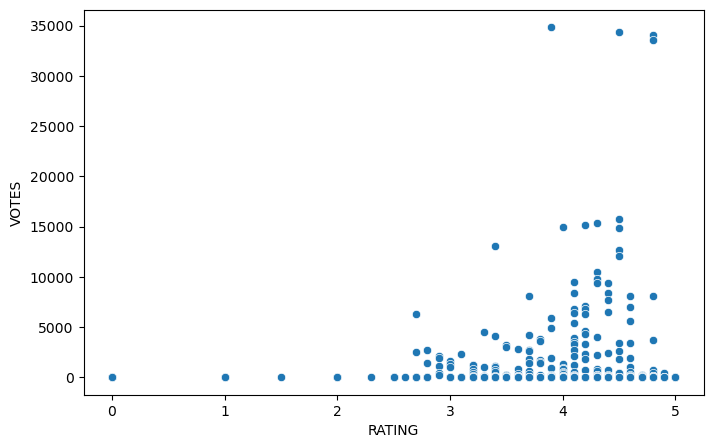

In [142]:
# Popularity of the movie and rating
# Scatterplot between the rating and votes (in df_fandango dataset)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='RATING', y='VOTES', data=df_fandango)

In [143]:
# Correlation between the different columns or features in df_fandango

df_fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<AxesSubplot:>

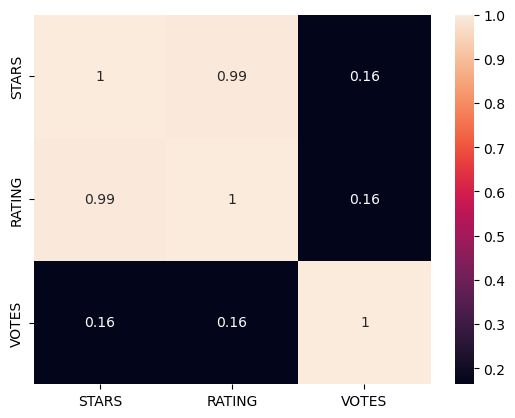

In [144]:
sns.heatmap(df_fandango.corr(), annot=True)

#### Now we are going to extract the year from Movie name in Fandango datasset
#### Movie name is in the form "Movie title (Year)"

In [145]:
title = "Fifty Shades of Grey (2015)"

title.split('(')

['Fifty Shades of Grey ', '2015)']

In [146]:
# There may be may parathesis in the film name 
# We need only last instance since last instance will be year of the movie

title.split('(')[-1]

'2015)'

In [147]:
title.split('(')[-1].replace(')', '')

'2015'

In [148]:
df_fandango['YEAR'] = df_fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', '')) 
df_fandango.tail()

,FILM,STARS,RATING,VOTES,YEAR
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964
503,Zarafa (2012),0.0,0.0,0,2012


### How many movies are there per year

In [149]:
df_fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

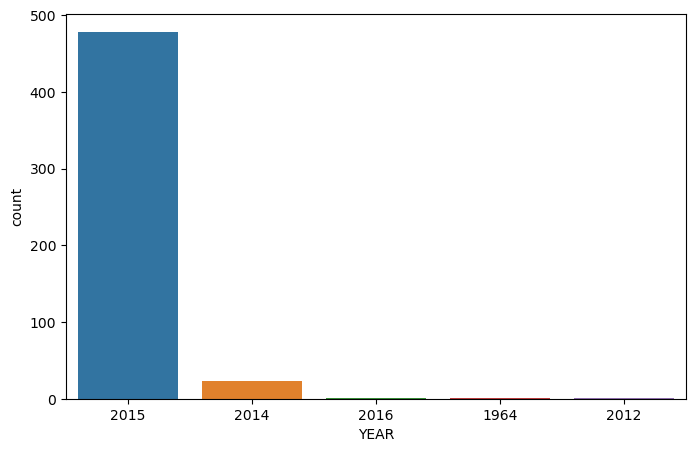

In [150]:
# To visualize the above counts in countplot
plt.figure(figsize= (8,5))
sns.countplot(data=df_fandango, x='YEAR')

#### 10 Movies with largeest number of votes

In [151]:
df_fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [152]:
# With 10 movies with largest rating

df_fandango.nlargest(10, 'RATING')

,FILM,STARS,RATING,VOTES,YEAR
296,National Theatre Live: Man and Superman (2015),5.0,5.0,10,2015
304,Maze Runner: The Scorch Trials (2015),5.0,5.0,9,2015
317,Cheatin' (2015),5.0,5.0,8,2015
323,League of Legends LCS Summer Finals (2015),5.0,5.0,7,2015
329,Hotel Transylvania 2 (2015),5.0,5.0,6,2015
330,Soaked In Bleach (2015),5.0,5.0,6,2015
365,National Theatre Live: The Hard Problem (2015),5.0,5.0,4,2015
366,The Boy (2015),5.0,5.0,4,2015
367,The Perfect Guy (2015),5.0,5.0,4,2015
380,Fall to Rise (2015),5.0,5.0,3,2015


#### Movies with 0 votes

In [153]:
df_fandango[df_fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [154]:
# To find the total number of movies with 0 votes

len(df_fandango[df_fandango['VOTES'] == 0])

69

#### Remove the column with 0 user votes

In [155]:
df_fandango_reviewed  = df_fandango[df_fandango['VOTES'] > 0]

In [156]:
df_fandango.shape

(504, 5)

In [157]:
df_fandango_reviewed.shape

(435, 5)

In [158]:
# We already knows the length of record having 0 votes are 69.
# we got the length after removal of 0 votes record as 435.

435 + 69

504

### There is little deviation between the True User Rating and Star Rating 

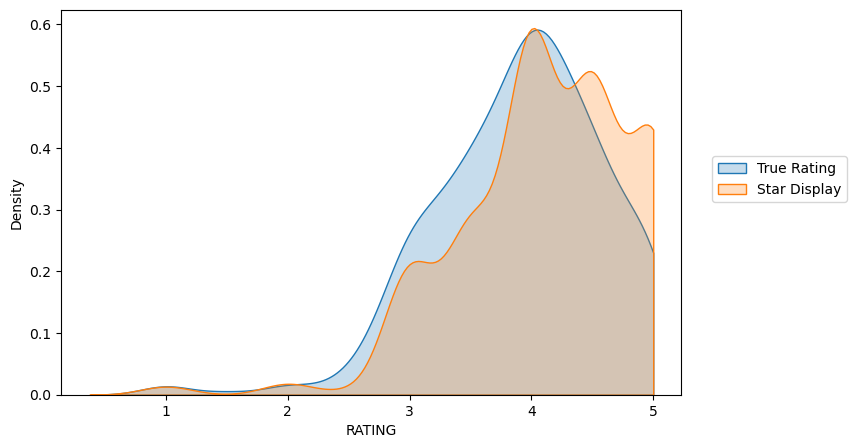

In [159]:
plt.figure(figsize=(8,5))

sns.kdeplot(data=df_fandango_reviewed, x='RATING', clip=[0, 5], fill=True, label='True Rating')
sns.kdeplot(data=df_fandango_reviewed, x='STARS', clip=[0,5], fill=True, label='Star Display')

plt.legend(loc=(1.05, 0.5))

### Create a new column "Star_Diff" ==> difference between Star rating and True rating

In [160]:
df_fandango_reviewed['STAR_DIFF'] = (df_fandango_reviewed['STARS'] - df_fandango_reviewed['RATING']).round(2)

C:\Users\MANU VENUGOPAL\AppData\Local\Temp\ipykernel_15200\1163999416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fandango_reviewed['STAR_DIFF'] = (df_fandango_reviewed['STARS'] - df_fandango_reviewed['RATING']).round(2)


In [161]:
df_fandango_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STAR_DIFF', ylabel='count'>

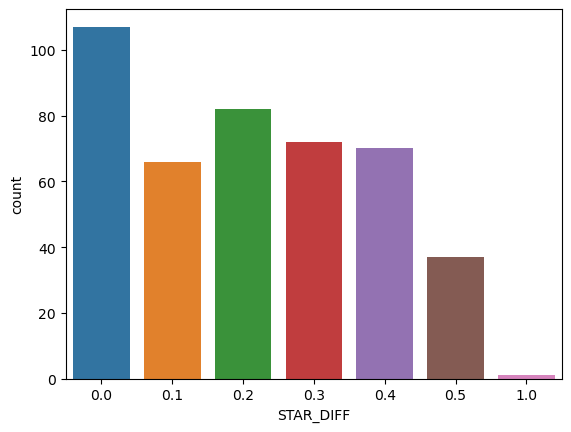

In [163]:
# Count plot to shows how many times these kind of differences occured
# 0 means Star rating and True rating are same
# .1, .2, .3, .4 means there are differences between the star rating and true rating

sns.countplot(data=df_fandango_reviewed, x='STAR_DIFF')

In [165]:
# to find the movie with star diff = 1

df_fandango_reviewed[df_fandango_reviewed['STAR_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [167]:
# to find the movie with star diff more than 0.5

df_fandango_reviewed[df_fandango_reviewed['STAR_DIFF'] >= 0.5]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
10,Cinderella (2015),5.0,4.5,12640,2015,0.5
11,Ant-Man (2015),5.0,4.5,12055,2015,0.5
50,Top Five (2014),4.0,3.5,3223,2014,0.5
70,Do You Believe? (2015),5.0,4.5,1793,2015,0.5
85,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,2015,0.5
89,Shaun the Sheep Movie (2015),4.5,4.0,896,2015,0.5
90,Love & Mercy (2015),4.5,4.0,864,2015,0.5
94,Far From The Madding Crowd (2015),4.5,4.0,804,2015,0.5
110,The Water Diviner (2015),4.5,4.0,397,2015,0.5


## Comparing Ratings of Fandango and other sites

In [168]:
df_all_scores

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


### Rotten Tomatoes has 2 reviews; One is User review and other is Critics review

(0.0, 100.0)

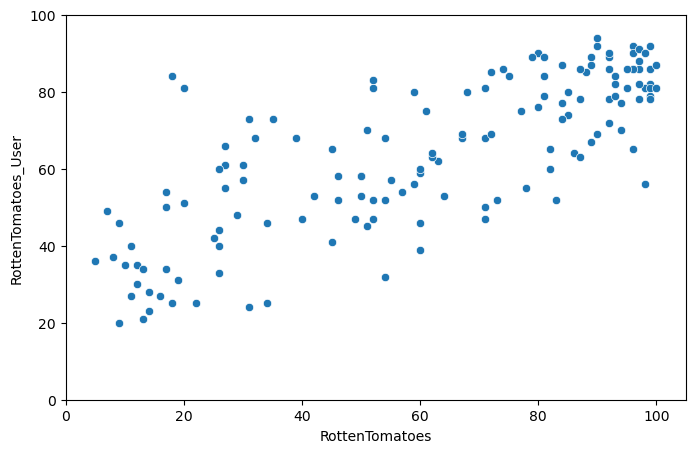

In [177]:
## Plotting the difference in user review and critics review
## If we want to set the limit among the X_axis and y_axis then use xlim and ylim.

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_scores, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,105)
plt.ylim(0,100)

In [178]:
# If the value is large positive then Crtics like the movie and user doesn't
# If the value is large negative then Users like the movie and critics doesn't

df_all_scores['RottenTomatoes_diff'] = df_all_scores['RottenTomatoes'] - df_all_scores['RottenTomatoes_User']
df_all_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


 ### Top 5 movies which critics like and user doesn't (we need to find large positive values)

In [183]:
df_all_scores.nlargest(5, 'RottenTomatoes_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


### Top 5 movies user like and critics doesn't (we need to find the large neagtive values)

In [184]:
df_all_scores.nsmallest(5, 'RottenTomatoes_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


## MetaCrtics also has 2 reviews. One related to critics review and one related to User.

(0.0, 10.0)

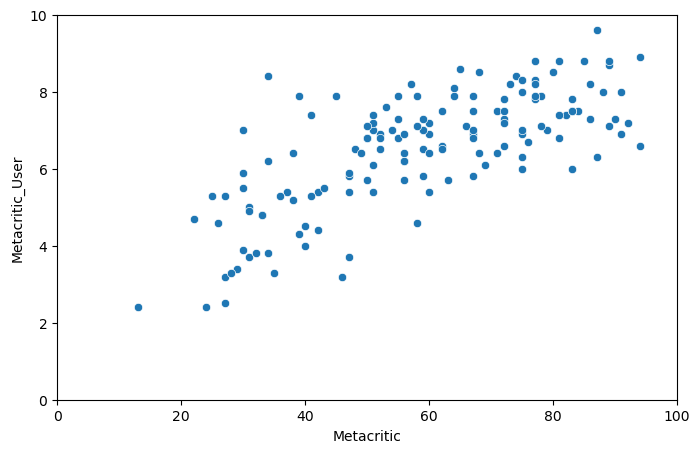

In [186]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_scores, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

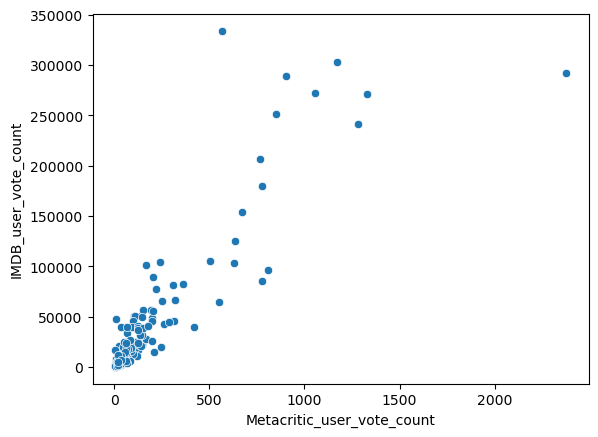

In [187]:
# Scatterplot to show the relation between the MetaCritic and IMDB user votes

sns.scatterplot(data=df_all_scores, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [189]:
# Here we can see the difference in votes between IMDB and MetaCrtics
# Movie with highest votes in IMDB (Votes in IMDB is 3,34.164 however the vote in MetaCritics is 566).


df_all_scores.nlargest(2, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2
65,Birdman (2014),92,78,88,8.0,7.9,1171,303505,14


## Now we need to compare the Rating in Fandango and Other site 

In [191]:
# So we need to merge the two data frame.
# Risk involved will be not all the record might not be common in both dataframe.
# So, to avoid null values we may merge the dataframe by means of Inner Join.

df = pd.merge(df_fandango, df_all_scores, on='FILM', how='inner')
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [193]:
# Different rating are in different format, some are within 100 limit some in 10 and some in 5.
# We have to noamalize it to be within one limit.
# So, lets normalize it with in the range of 0 - 5


df['RT_Norm'] = df['RottenTomatoes']/20
df['RTU_Norm'] = df['RottenTomatoes_User']/20

df['M_Norm'] = df['Metacritic']/20
df['MU_Norm'] = df['Metacritic_User']/2

df['IMDB_Norm'] = df['IMDB']/2

In [194]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'RottenTomatoes_diff', 'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm',
       'IMDB_Norm'],
      dtype='object')

In [195]:
df_Norm_Scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm','IMDB_Norm']]
df_Norm_Scores

,STARS,RATING,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...
140,3.5,3.5,4.35,3.15,3.40,3.20,3.35
141,4.0,3.6,4.75,4.05,4.35,3.15,3.50
142,4.5,4.2,4.65,4.20,3.35,3.50,3.90
143,4.0,3.9,4.75,4.30,4.30,3.65,3.70


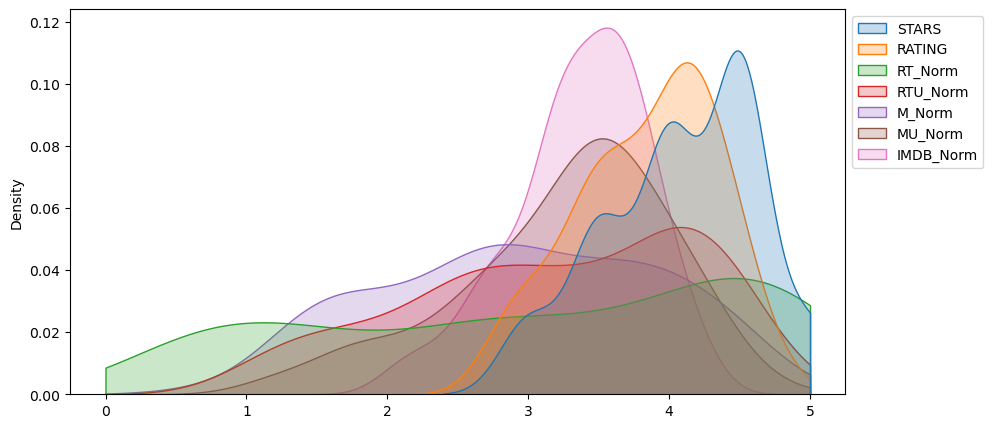

In [209]:
## TO see how much each scores deviates 

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data=df_Norm_Scores, shade=True, clip=[0,5])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


<Figure size 4500x1200 with 0 Axes>

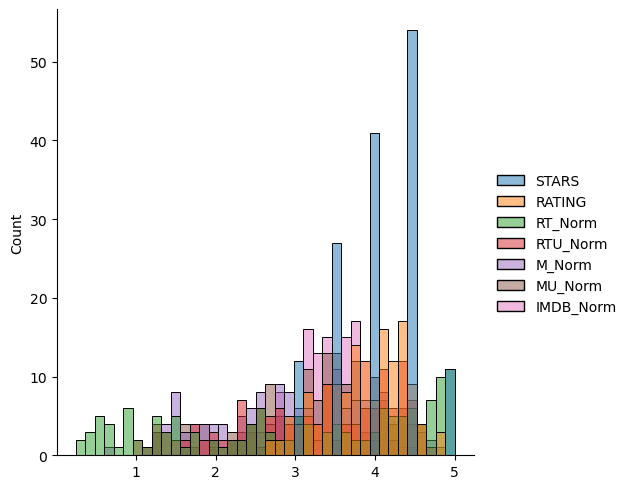

In [223]:
# Comparing all normalised scores
plt.figure(figsize=(30,8), dpi=150)
sns.displot(df_Norm_Scores, bins= 40)

<AxesSubplot:ylabel='Density'>

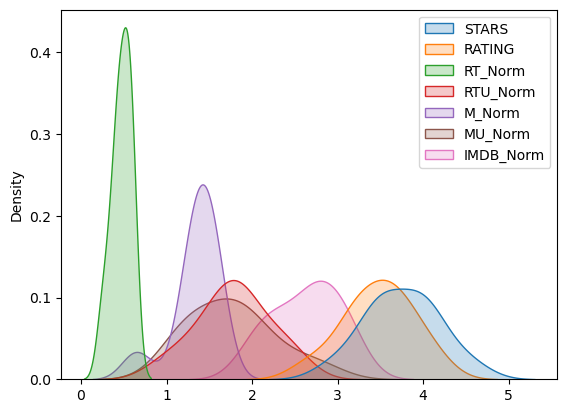

In [225]:
## We can list the worst 10 movies based on RottenTomatoes rating 
## Then plot a KDE plot on resulting datatset.


worst_10_movies = df_Norm_Scores.nsmallest(10, 'RT_Norm')

sns.kdeplot(data=worst_10_movies, shade=True)

In [226]:
## even for the movies that are rated below average by other sites are given high rating and star rating in Fandango.